<a href="https://colab.research.google.com/github/clionelove123/temp_test/blob/main/Chap_4_machinelearning_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# MNIST 데이터를 다운로드 합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 이미지들을 float32 데이터 타입으로 변경합니다.
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# 28*28 형태의 이미지를 784차원으로 flattening 합니다.
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
x_train, x_test = x_train / 255., x_test / 255.
# 레이블 데이터에 one-hot encoding을 적용합니다.
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# tf.data API를 이용해서 데이터를 섞고 batch 형태로 가져옵니다.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(100)
train_data_iter = iter(train_data)

In [ ]:
# Softmax Regression 모델을 위한 tf.Variable들을 정의합니다.
W = tf.Variable(tf.zeros(shape=[784, 10]))
b = tf.Variable(tf.zeros(shape=[10]))

In [ ]:
# Softmax Regression 모델을 정의합니다.
@tf.function
def softmax_regression(x):
  logits = tf.matmul(x, W) + b
  return tf.nn.softmax(logits)

In [ ]:
# cross-entropy 손실 함수를 정의합니다.
@tf.function
def cross_entropy_loss(y_pred, y):
  return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_pred), axis=[1]))
  #return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logtis, labels=y)) # tf.nn.softmax_cross_entropy_with_logits API를 이용한 구현

In [ ]:
# 모델의 정확도를 출력하는 함수를 정의합니다.
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy

In [ ]:
# 최적화를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(0.5)

In [ ]:
# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_pred = softmax_regression(x)
    loss = cross_entropy_loss(y_pred, y)
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# 1000번 반복을 수행하면서 최적화를 수행합니다.
for i in range(1000):
  batch_xs, batch_ys = next(train_data_iter)
  train_step(batch_xs, batch_ys)
  if i<10:
    print("Train 정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_train), y_train))
    print("Test 정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_test), y_test))
  else:
    if (i%100)<1:
      print("Train 정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_train), y_train))
      print("Test 정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_test), y_test))

Train 정확도(Accuracy): 0.221500
Test 정확도(Accuracy): 0.223600
Train 정확도(Accuracy): 0.571683
Test 정확도(Accuracy): 0.586400
Train 정확도(Accuracy): 0.620200
Test 정확도(Accuracy): 0.619800
Train 정확도(Accuracy): 0.628683
Test 정확도(Accuracy): 0.635600
Train 정확도(Accuracy): 0.706600
Test 정확도(Accuracy): 0.711800
Train 정확도(Accuracy): 0.651567
Test 정확도(Accuracy): 0.654000
Train 정확도(Accuracy): 0.687950
Test 정확도(Accuracy): 0.686800
Train 정확도(Accuracy): 0.703350
Test 정확도(Accuracy): 0.704700
Train 정확도(Accuracy): 0.592533
Test 정확도(Accuracy): 0.598000
Train 정확도(Accuracy): 0.703933
Test 정확도(Accuracy): 0.705400
Train 정확도(Accuracy): 0.884717
Test 정확도(Accuracy): 0.890600
Train 정확도(Accuracy): 0.899433
Test 정확도(Accuracy): 0.904500
Train 정확도(Accuracy): 0.903133
Test 정확도(Accuracy): 0.909100
Train 정확도(Accuracy): 0.907567
Test 정확도(Accuracy): 0.913500
Train 정확도(Accuracy): 0.910483
Test 정확도(Accuracy): 0.912900
Train 정확도(Accuracy): 0.910717
Test 정확도(Accuracy): 0.915200
Train 정확도(Accuracy): 0.913550
Test 정확도(Accuracy): 0.9139

In [ ]:
# 학습이 끝나면 학습된 모델의 정확도를 출력합니다.
print("정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_test), y_test)) # 정확도 : 약 91%

정확도(Accuracy): 0.918000


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from google.colab import files
uploaded = files.upload()

Saving temp3.png to temp3.png


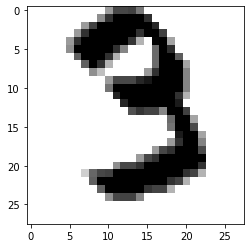

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
#bmpSample = mpimg.imread('temp1.bmp')
#bmpSample_2 = mpimg.imread('temp2.bmp')
bmpSample_3 = mpimg.imread('temp3.png')

#plt.figure(figsize=(15, 10))
#plt.subplot(1,3,1)
#plt.title('bmp')


#plt.imshow(bmpSample)
plt.imshow(bmpSample_3)



In [ ]:
#bmpSample_t=bmpSample.astype('float32')
#bmpSample_t_2=bmpSample_2.astype('float32')
bmpSample_t_3=bmpSample_3.astype('float32')

#bmpSample_t = bmpSample_t.reshape([-1, 784])
#bmpSample_t_2 = bmpSample_t_2.reshape([-1, 784])
bmpSample_t_3 = bmpSample_t_3.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
##bmpSample_t = bmpSample_t / 255.
#bmpSample_t_2 = bmpSample_t_2 / 255.
bmpSample_t_3 = bmpSample_t_3 / 255.





In [ ]:
#softmax_regression(bmpSample_t)


In [ ]:
#softmax_regression(bmpSample_t_2)

In [ ]:
softmax_regression(bmpSample_t_3)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.05517964, 0.10664274, 0.0914241 , 0.06435276, 0.08370674,
        0.29632473, 0.07462131, 0.14653811, 0.0212049 , 0.06000502],
       [0.05567442, 0.10509676, 0.09175422, 0.06377359, 0.08436838,
        0.2956236 , 0.07476223, 0.14743757, 0.02120895, 0.06030023],
       [0.05610307, 0.10565853, 0.09234568, 0.06530987, 0.08212218,
        0.29671296, 0.07416476, 0.14643185, 0.02085134, 0.06029978]],
      dtype=float32)>